In [120]:
import numpy as np
import scipy.misc # to visualize only
import os
from PIL import Image
import pickle
import h5py

# Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')
# path='/content/drive/My Drive/Colab Notebooks/Comp551_P3/'
path=''

y = h5py.File(path+'MNIST_synthetic.h5','r')

x = y.get('train_dataset')

x = np.array(x)

i = x[2]
print(i.shape)
img = Image.fromarray(np.uint8(i[:,:,0]))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(64, 64, 1)


In [40]:
def cropImage(pix):
    first__row_white_pixel_index = 64
    first__col_white_pixel_index = 64

    last__row_white_pixel_index = 0
    last__col_white_pixel_index = 0

    # get the first row in which a white pixel appears
    for col in range(0, 64):
        for row in range (0, 64):
            pix_val = pix[row, col]
            if (pix_val == 1 and row < first__row_white_pixel_index):
                first__row_white_pixel_index = row
                break

    # get the first column in which a white pixel occurs
    for row in range(0, 64):
        for col in range (0, 64):
            pix_val = pix[row, col]
            if (pix_val == 1 and col < first__col_white_pixel_index):
                first__col_white_pixel_index = col
                break

    # get the last row in which a white pixel occurs
    for col in range(0, 64):
        for row in range (63, -1, -1):
            pix_val = pix[row, col]
            if (pix_val == 1 and row  > last__row_white_pixel_index):
                last__row_white_pixel_index = row
                break

    # get the last column in which a white pixel occurs
    for row in range(0, 64):
        for col in range (63, -1, -1):
            pix_val = pix[row, col]
            if (pix_val == 1 and col > last__col_white_pixel_index):
                last__col_white_pixel_index = col
                break

    # draw a bounding box according to the above dimensions
    bbox = (first__row_white_pixel_index, first__col_white_pixel_index,last__row_white_pixel_index, last__col_white_pixel_index)
    #return first__row_white_pixel_index, first__col_white_pixel_index,last__row_white_pixel_index, last__col_white_pixel_index
    
#     working_slice = img.crop(bbox).save(os.path.join(os.getcwd(), "slice_num" + str(num) + "_.png"))
    return img.crop(bbox)

In [127]:
i = x[10]
print(i.shape)
#print(i)
img = Image.fromarray(np.uint8(i[:,:,0]))
pix = img.load()
img.show()
newsize = (300, 300) 
im1 = img.resize(newsize)
im1.show()
'''croppedImg = cropImage(pix)
print(croppedImg.size)
print(croppedImg)'''

(64, 64, 1)


'croppedImg = cropImage(pix)\nprint(croppedImg.size)\nprint(croppedImg)'

In [129]:
import cv2

In [130]:
cimg = cv2.cvtColor(np.array(im1), cv2.COLOR_RGB2BGR)

In [131]:
import matplotlib.pyplot as plt

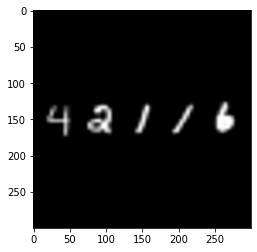

In [132]:
plt.imshow(cimg)

In [134]:
import imutils

In [135]:
gray = cv2.cvtColor(cimg, cv2.COLOR_BGR2GRAY)

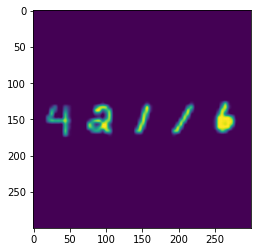

In [136]:
plt.imshow(gray)

In [137]:
blurred = cv2.GaussianBlur(gray, (5,5), 0)

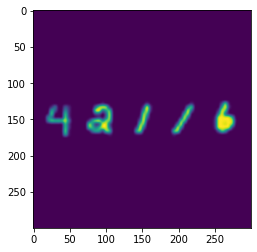

In [138]:
plt.imshow(blurred)

In [139]:
edged = cv2.Canny(blurred, 50, 200, 255)

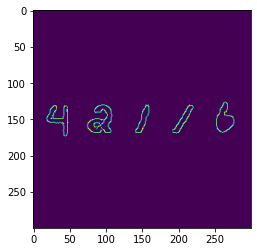

In [140]:
plt.imshow(edged)

In [141]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
displayCnt = None
print(cnts)

[array([[[264, 126]],

       [[263, 127]],

       [[262, 127]],

       [[262, 128]],

       [[261, 129]],

       [[261, 130]],

       [[260, 131]],

       [[260, 132]],

       [[258, 134]],

       [[258, 135]],

       [[257, 136]],

       [[257, 140]],

       [[256, 141]],

       [[256, 142]],

       [[253, 145]],

       [[253, 148]],

       [[252, 149]],

       [[252, 159]],

       [[253, 160]],

       [[253, 163]],

       [[257, 167]],

       [[259, 167]],

       [[260, 168]],

       [[261, 168]],

       [[262, 167]],

       [[264, 167]],

       [[265, 166]],

       [[266, 166]],

       [[268, 164]],

       [[269, 164]],

       [[275, 158]],

       [[275, 156]],

       [[276, 155]],

       [[276, 150]],

       [[275, 149]],

       [[275, 147]],

       [[274, 146]],

       [[273, 146]],

       [[272, 145]],

       [[266, 145]],

       [[265, 144]],

       [[264, 144]],

       [[263, 143]],

       [[263, 141]],

       [[264, 140]],

       [[

In [145]:
thresh = cv2.threshold(blurred, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 5))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

(300, 300)


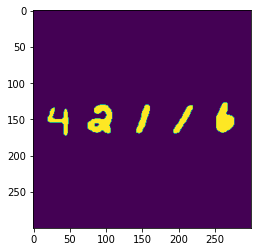

In [146]:
plt.imshow(thresh)
print(thresh.shape)

* **I am sliding a vertical rectangle along the x-axis and checking if the sum of the values is > threshold (= 0 for now). if it is, it means that it found a digit, else it is an empty space (I changed the threshold you made in the last part from cv2.THRESH_BINARY_INV to THRESH_BINARY). We can tune the rect_width in case there are images with digits that are very close together. There is also a counter for more certainty**

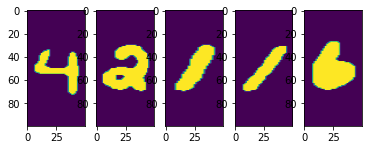

(100, 38)
(100, 43)
(100, 28)
(100, 36)


In [147]:
x_space_coord = []
y_space_coord = []

sum_thresh = 0    # If sum of all pixels is above this threshold, then we found a digit
on_digit = False

req_num_counts = 3        # We need to detect a digit at least this many number of times to consider it a digit
digit_count = 0
empty_count = 0

# Slide a vertical rectangle to detect empty spaces between digits
rect_width = 3
for x in range(thresh.shape[1] - rect_width):
  
  rect_window = thresh[:,x:x+rect_width]
  s = np.sum(rect_window)

  # We may have found a digit
  if s > sum_thresh:
    digit_count += 1
    empty_count = 0
    if  digit_count >= req_num_counts and on_digit == False:
      on_digit = True
      x_space_coord.append(x - 5) if len(x_space_coord) % 2 == 0 else x_space_coord.append(x + 2)

  # We may have found a space between digits
  else:
    empty_count += 1
    digit_count = 0
    if  empty_count >= req_num_counts and on_digit == True:
      on_digit = False
      x_space_coord.append(x - 5) if len(x_space_coord) % 2 == 0 else x_space_coord.append(x + 2)

y1 = 100
y2 = 200

# The segmented images won't have the same shape, we can resize them later
digit_imgs = []

for i, x1 in enumerate(x_space_coord[::2]):
  x2 = x_space_coord[2 * i + 1]
  digit_imgs.append(thresh[y1:y2, x1:x2])

# plt.figure(figsize=(15,15))
for i, d_img in enumerate(digit_imgs):
  plt.subplot(1, len(digit_imgs), i+1), plt.imshow(cv2.resize(d_img, (50, 100)))
plt.show()

print(digit_imgs[0].shape)
print(digit_imgs[1].shape)
print(digit_imgs[2].shape)
print(digit_imgs[3].shape)

# Slide a horizontal rectangle to detect limits across the y_axis (this might not be necessary, we can jst)
# on_digit = False
# req_num_counts = 3        # We need to detect a digit at least this many number of times to consider it a digit
# digit_count = 0
# empty_count = 0 
               
# rect_height = 3
# for y in range(thresh.shape[0] - rect_height):
  
#   rect_window = thresh[y:y+rect_height,]
#   s = np.sum(rect_window)

#   # We may have found a digit
#   if s > threshold:
#     digit_count += 1
#     empty_count = 0
#     if  digit_count >= req_num_counts and on_digit == False:
#       on_digit = True
#       y_space_coord.append(y - 5) if len(y_space_coord) % 2 == 0 else y_space_coord.append(y + 2)

#   # We may have found a space between digits
#   else:
#     empty_count += 1
#     digit_count = 0
#     if  empty_count >= req_num_counts and on_digit == True:
#       on_digit = False
#       y_space_coord.append(y - 5) if len(y_space_coord) % 2 == 0 else y_space_coord.append(y + 2)




[array([[[173, 161]],

       [[172, 162]],

       [[173, 162]]], dtype=int32), array([[[179, 158]],

       [[178, 159]],

       [[176, 159]],

       [[175, 160]],

       [[176, 159]],

       [[178, 159]],

       [[179, 158]],

       [[182, 161]],

       [[182, 162]],

       [[181, 163]],

       [[180, 163]],

       [[179, 164]],

       [[178, 164]],

       [[176, 162]],

       [[176, 163]],

       [[177, 163]],

       [[178, 164]],

       [[179, 164]],

       [[180, 163]],

       [[182, 163]],

       [[182, 161]],

       [[181, 160]],

       [[181, 159]],

       [[180, 159]]], dtype=int32), array([[[180, 156]]], dtype=int32), array([[[116, 149]],

       [[118, 149]],

       [[121, 152]],

       [[121, 151]],

       [[119, 149]]], dtype=int32), array([[[174, 147]]], dtype=int32), array([[[120, 140]]], dtype=int32), array([[[116, 139]],

       [[116, 140]]], dtype=int32), array([[[188, 137]],

       [[185, 140]],

       [[184, 140]],

       [[183, 141]],


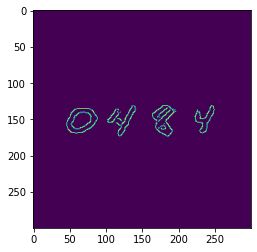

In [27]:
# find contours in the thresholded image, then initialize the
# digit contours lists
e1 = cv2.Canny(blurred, 50, 200, 255)
cnts = cv2.findContours(e1.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
plt.imshow(e1)
print(cnts)
digitCnts = []
# loop over the digit area candidates
for c in cnts:
    # compute the bounding box of the contour
    #print (c)
    (x, y, w, h) = cv2.boundingRect(c)
    digitCnts.append(c)

In [28]:
# loop over each of the digits
for c in digitCnts:
    # extract the digit ROI
    (x, y, w, h) = cv2.boundingRect(c)
    print (cv2.boundingRect(c))
    roi = thresh[y:y + h, x:x + w]
    
    # compute the width and height of each of the 7 segments
    # we are going to examine
    (roiH, roiW) = roi.shape
    (dW, dH) = (int(roiW * 0.25), int(roiH * 0.15))
    dHC = int(roiH * 0.05)
    final = cv2.rectangle(blurred, (x, y), (x + w, y + h), (0, 255, 0), 1)

(172, 161, 2, 2)
(175, 158, 8, 7)
(180, 156, 1, 1)
(116, 149, 6, 4)
(174, 147, 1, 1)
(120, 140, 1, 1)
(116, 139, 1, 2)
(172, 137, 17, 17)
(115, 136, 3, 2)
(102, 136, 17, 19)
(46, 135, 43, 35)
(171, 134, 14, 14)
(222, 131, 28, 39)
(164, 131, 33, 43)
(114, 131, 28, 43)
(122, 131, 15, 27)


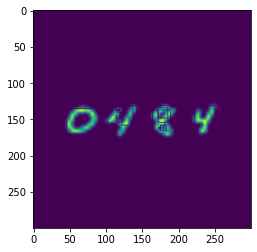

In [29]:
plt.imshow(final)